In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'y data')

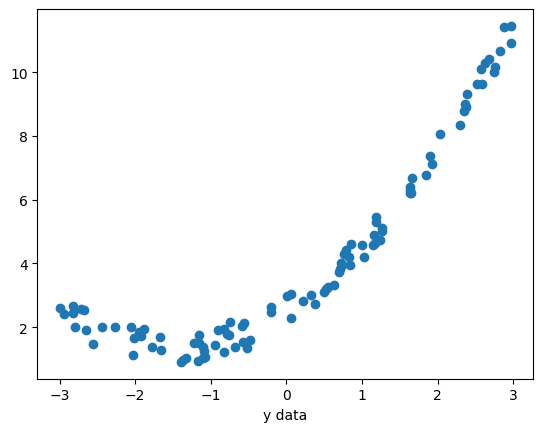

In [59]:
#we will create a data set using numpy

X=6*np.random.rand(100,1)-3
y=0.5*X**2+ 1.5*X+2+np.random.rand(100,1)

plt.scatter(X,y)
plt.xlabel("X data")
plt.xlabel("y data")

In [60]:
print(X.size)

100


In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [62]:
#no need to standardize because here data is already in same units so directly go for model
# first lets see if we do linear regression what will happen
from sklearn.linear_model import LinearRegression

regression1=LinearRegression()

In [63]:
regression1.fit(X_train,y_train)

LinearRegression()

In [64]:
regression1.coef_

array([[1.68177107]])

In [65]:
regression1.intercept_

array([3.83697147])

In [66]:
y_pred=regression1.predict(X_test)

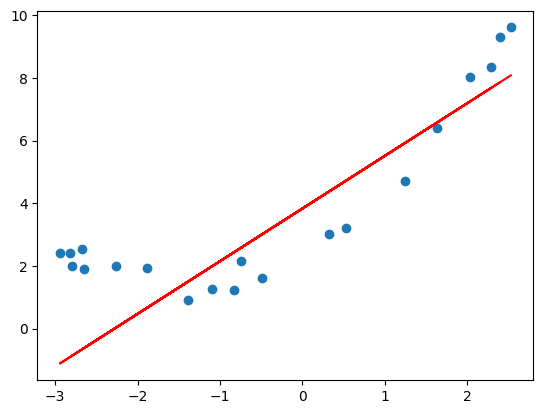

In [67]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred,color="red")

In [68]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)
#display adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.5615112534047915
0.5371507674828355


if you see the above r2 score its 33 which means its very bad and from the plot its evident that line is underfitting
now the above eqn of line is of the form y=mx+c
# for polynomial case it should be like y=n*x**2+mx+c

In [69]:
from sklearn.preprocessing import PolynomialFeatures

In [70]:
poly=PolynomialFeatures(degree=2,include_bias=True)

X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [71]:
regression=LinearRegression()
regression.fit(X_train_poly,y_train)
y_pred1=regression.predict(X_test_poly)

score=r2_score(y_test,y_pred1)
print(score)
#display adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test_poly.shape[1]-1))

0.98791233159077
0.9856458937640393


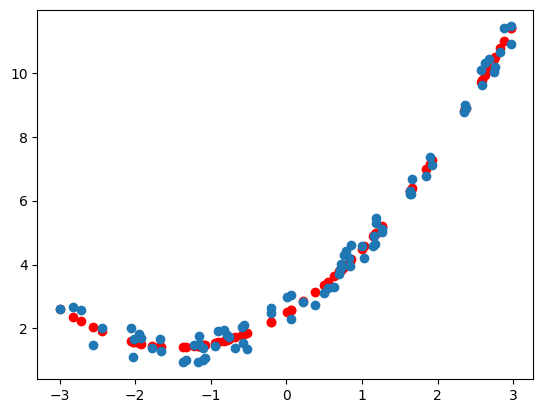

In [72]:
plt.scatter(X_train,regression.predict(X_train_poly),color="Red")
plt.scatter(X_train,y_train)

In [73]:
print(regression.coef_)

[[0.         1.48898445 0.5103744 ]]


In [74]:
#3 Prediction of new data set
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00],
       [ 1.00000000e+00, -2.63819095e+00,  6.96005151e+00],
       [ 1.00000000e+00, -2.60804020e+00,  6.80187369e+00],
       [ 1.00000000e+00, -2.57788945e+00,  6.64551400e+00],
       [ 1.00000000e+00, -2.54773869e+00,  6.49097245e+00],
       [ 1.00000000e+00, -2.51758794e+00

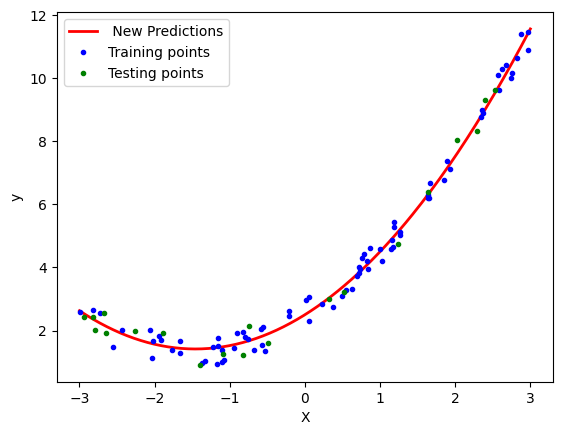

In [75]:
y_new = regression.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label=" New Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

Now if you see the model performs well if its not performing well you can change the degree to 3 and do the same again

finally we can you the model which performs well

 What is a pipeline in scikit-learn?
A Pipeline in sklearn is used to chain together multiple processing steps (like preprocessing, feature engineering, and modeling) into one single object. This helps in:

Clean code: Avoids repeating the same preprocessing code for train/test or cross-validation.

Avoiding data leakage: Ensures transformations are applied only on training data when fitting, and then applied to test data in the same way.

Hyperparameter tuning: Makes it easy to tune preprocessing and model parameters together using GridSearchCV or RandomizedSearchCV.

Reusability: Once the pipeline is defined, you can reuse it on new datasets without rewriting steps.

In [76]:
from sklearn.pipeline import Pipeline
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,y_train) ## ploynomial and fit of linear reression
    y_pred_new=poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()
    

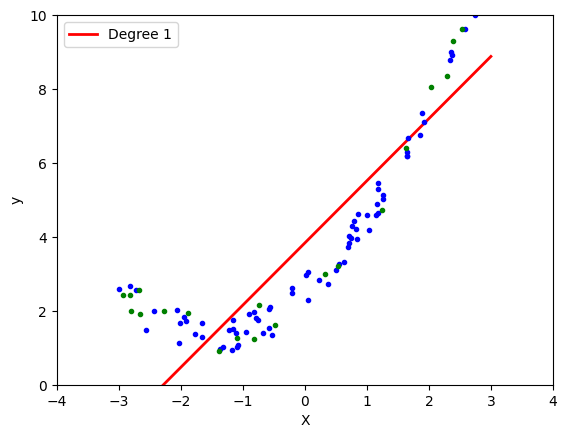

In [77]:
poly_regression(1)

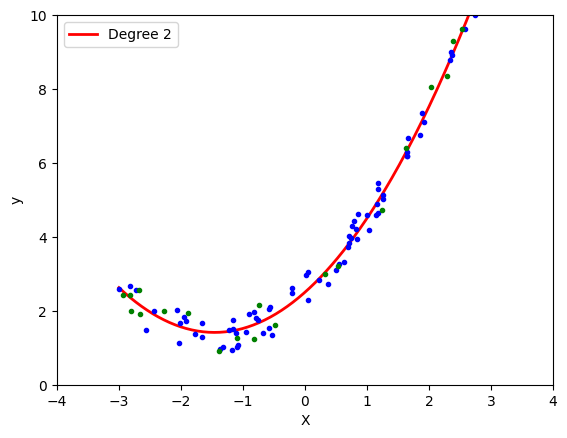

In [78]:
poly_regression(2)

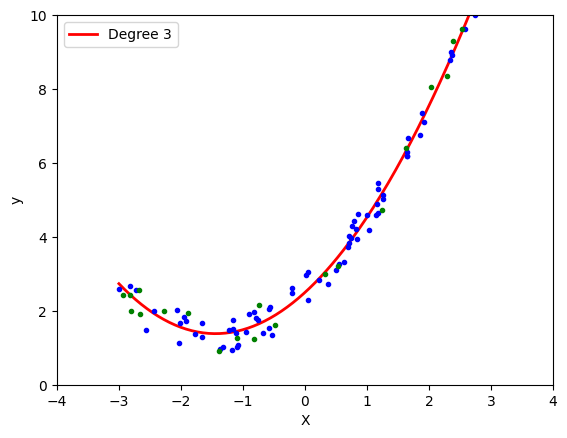

In [79]:
poly_regression(3)

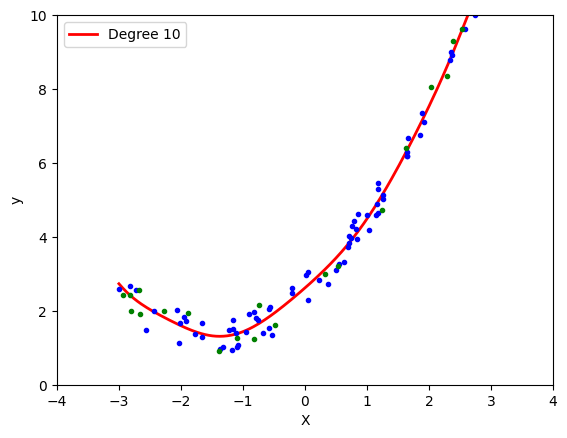

In [80]:
poly_regression(10)